In [3]:
import xml.etree.ElementTree as ET
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns

In [4]:
# 2D brazil
tree = ET.parse('brazil58.xml')
root = tree.getroot()
num_vertices = len(root.findall('.//vertex'))
costs = [[0.0] * num_vertices for _ in range(num_vertices)]

count_vertex = 0
for vertex in root.findall('.//vertex'):
    source_id = count_vertex

    for edge in vertex.findall('edge'):
        target_id = int(edge.text)
        cost = float(edge.get('cost'))
        costs[source_id - 1][target_id - 1] = cost 
        
    count_vertex += 1

for i in costs:
    print(i)


[0.0, 314.0, 2636.0, 666.0, 1096.0, 4645.0, 693.0, 2889.0, 287.0, 772.0, 1135.0, 2875.0, 1424.0, 2185.0, 1193.0, 846.0, 2142.0, 1127.0, 3104.0, 1484.0, 490.0, 990.0, 1950.0, 2855.0, 975.0, 926.0, 1214.0, 599.0, 2535.0, 3860.0, 3027.0, 1407.0, 1811.0, 359.0, 1060.0, 1557.0, 2959.0, 394.0, 2740.0, 98.0, 3538.0, 856.0, 2026.0, 1710.0, 1733.0, 508.0, 194.0, 532.0, 2906.0, 435.0, 335.0, 2470.0, 137.0, 234.0, 2072.0, 1196.0, 1517.0, 2635.0]
[314.0, 0.0, 2730.0, 706.0, 791.0, 4588.0, 922.0, 2991.0, 217.0, 760.0, 1050.0, 2915.0, 1119.0, 1776.0, 1451.0, 5410.0, 2182.0, 846.0, 3333.0, 578.0, 721.0, 1030.0, 1990.0, 2895.0, 670.0, 835.0, 909.0, 287.0, 2575.0, 3803.0, 3067.0, 1102.0, 1505.0, 158.0, 439.0, 1248.0, 2902.0, 287.0, 2780.0, 276.0, 3436.0, 771.0, 2066.0, 1395.0, 1740.0, 407.0, 279.0, 334.0, 3135.0, 337.0, 235.0, 2699.0, 451.0, 546.0, 1882.0, 2699.0, 1557.0, 2713.0]
[2636.0, 2730.0, 0.0, 2824.0, 3457.0, 6083.0, 2120.0, 2040.0, 2844.0, 2973.0, 3937.0, 1958.0, 3710.0, 4363.0, 2941.0, 3207.0

# BASIC ACO

In [5]:
# Function to initialize pheromone levels on edges
def initialize_pheromones(num_vertices):
    return [[1.0] * num_vertices for _ in range(num_vertices)]

# Function to choose the next city based on pheromone levels and distances
def choose_next_city(current_city, allowed_cities, pheromones, distances, alpha=1.0, beta=2.0):
    allowed_cities_list = list(allowed_cities)
    pheromone_values = [
        pheromones[current_city][city] ** alpha * (1.0 / distances[current_city][city]) ** beta
        for city in allowed_cities_list
    ]
    total = sum(pheromone_values)
    probabilities = [value / total for value in pheromone_values]
    chosen_city = random.choices(allowed_cities_list, probabilities)[0]
    return chosen_city


# Function to update pheromone levels based on ant paths
def update_pheromones(pheromones, ant_paths, decay=0.3, Q=1.0):
    for path_cost, path in ant_paths:
        pheromone_increment = Q / path_cost
        for i in range(len(path) - 1):
            pheromones[path[i]][path[i + 1]] = (1.0 - decay) * pheromones[path[i]][path[i + 1]] + pheromone_increment

# Ant Colony Optimization algorithm
def ant_colony_optimization(num_ants, num_iterations, distances, alpha=1.0, beta=2.0, decay=0.3, Q=1.0):
    num_vertices = len(distances)
    pheromones = initialize_pheromones(num_vertices)

    global_best_path = None
    global_best_cost = float('inf')

    for iteration in range(num_iterations):
        ant_paths = []

        for ant in range(num_ants):
            current_city = random.randint(0, num_vertices - 1)
            allowed_cities = set(range(num_vertices))
            allowed_cities.remove(current_city)
            path = [current_city]
            path_cost = 0.0

            while allowed_cities:
                next_city = choose_next_city(current_city, allowed_cities, pheromones, distances, alpha, beta)
                path_cost += distances[current_city][next_city]
                path.append(next_city)
                allowed_cities.remove(next_city)
                current_city = next_city

            path_cost += distances[path[-1]][path[0]]  
            ant_paths.append((path_cost, path))

            if path_cost < global_best_cost:
                global_best_cost = path_cost
                global_best_path = path

        update_pheromones(pheromones, ant_paths, decay, Q)

    return global_best_path, global_best_cost


In [7]:
distances = costs  
num_ants = [50, 150, 250]
num_iterations = 100
d_num_ants = {"50": [], "150": [], "250": []}

for _ in range(5):
    print(" ")
    for i in num_ants:
        best_path, best_cost = ant_colony_optimization(i, num_iterations, distances)
        print(f"{i} Ants, Best Cost: {best_cost}")
        d_num_ants[str(i)].append(best_cost)

data = d_num_ants

 
50 Ants, Best Cost: 36431.0
150 Ants, Best Cost: 36357.0
250 Ants, Best Cost: 35432.0
 
50 Ants, Best Cost: 35060.0
150 Ants, Best Cost: 36177.0
250 Ants, Best Cost: 36720.0
 
50 Ants, Best Cost: 39076.0
150 Ants, Best Cost: 33936.0
250 Ants, Best Cost: 34485.0
 
50 Ants, Best Cost: 36678.0
150 Ants, Best Cost: 35805.0
250 Ants, Best Cost: 36025.0
 
50 Ants, Best Cost: 37692.0
150 Ants, Best Cost: 35385.0
250 Ants, Best Cost: 35283.0


In [8]:
# Calculate the mean average and interquartile range per key
mean_values = {key: np.mean(values) for key, values in data.items()}
iqr_values = {key: np.percentile(values, 75) - np.percentile(values, 25) for key, values in data.items()}

# Create a pandas DataFrame
df = pd.DataFrame(list(mean_values.items()), columns=['Ants', 'Mean'])
df['Ants'] = df['Ants'].astype(int)  
df['IQR'] = df['Ants'].astype(str).map(iqr_values)

# Sort the DataFrame by 'Key'
df = df.sort_values(by='Ants')

df.head()


,Ants,Mean,IQR
0,50,36987.4,1261.0
1,150,35532.0,792.0
2,250,35589.0,742.0


# MMAS ACO

In [9]:
def initialize_pheromones(graph, initial_pheromone=1.0):
    pheromones = np.full_like(graph, initial_pheromone)
    np.fill_diagonal(pheromones, 0)  # Set pheromones on the diagonal to 0
    return pheromones

def ant_colony(graph, num_ants, alpha, beta, rho, q):
    pheromones = initialize_pheromones(graph)
    best_path = None
    best_cost = float('inf')

    for _ in range(num_ants):
        ant_path, ant_cost = construct_solution(graph, pheromones, alpha, beta)
        if ant_cost < best_cost:
            best_path = ant_path
            best_cost = ant_cost

        update_pheromones(pheromones, ant_path, ant_cost, rho, q)

    return best_path, best_cost

def construct_solution(graph, pheromones, alpha, beta):
    start = np.random.choice(len(graph))
    visited = set([start])
    path = [start]
    cost = 0

    while len(visited) < len(graph):
        next_node = choose_next_node(graph, pheromones, path[-1], visited, alpha, beta)
        path.append(next_node)
        visited.add(next_node)
        cost += graph[path[-2]][path[-1]]

    cost += graph[path[-1]][path[0]]
    return path, cost

def choose_next_node(graph, pheromones, current_node, visited, alpha, beta):
    unvisited_nodes = set(range(len(graph))) - visited
    probabilities = calculate_probabilities(graph, pheromones, current_node, unvisited_nodes, alpha, beta)
    next_node = np.random.choice(list(unvisited_nodes), p=probabilities)
    return next_node

def calculate_probabilities(graph, pheromones, current_node, unvisited_nodes, alpha, beta):
    probabilities = []
    total_pheromone = 0

    for node in unvisited_nodes:
        pheromone = pheromones[current_node][node]
        visibility = 1 / graph[current_node][node]
        total_pheromone += (pheromone ** alpha) * (visibility ** beta)

    for node in unvisited_nodes:
        pheromone = pheromones[current_node][node]
        visibility = 1 / graph[current_node][node]
        probability = (pheromone ** alpha) * (visibility ** beta) / total_pheromone
        probabilities.append(probability)

    return probabilities

def update_pheromones(pheromones, path, cost, rho, q):
    if cost == 0:
        # Handle the case where the cost is zero to prevent division by zero
        return

    pheromone_deposit = q / cost

    for i in range(len(path) - 1):
        if cost != 0:
            pheromones[path[i]][path[i + 1]] = (1 - rho) * pheromones[path[i]][path[i + 1]] + rho * pheromone_deposit

    if cost != 0: 
        pheromones[path[-1]][path[0]] = (1 - rho) * pheromones[path[-1]][path[0]] + rho * pheromone_deposit


def mmas_aco(graph, num_ants, num_iterations, alpha, beta, rho, q):
    best_path = None
    best_cost = float('inf')

    for _ in range(num_iterations):
        path, cost = ant_colony(graph, num_ants, alpha, beta, rho, q)
        if cost < best_cost:
            best_path = path
            best_cost = cost

    return best_path, best_cost


In [10]:
graph = costs

# Set algorithm parameters
num_iterations = 100
alpha = 1.0
beta = 2.0
rho = 0.3
q = 1.0

num_ants = [50, 150, 250]
d_num_ants2 = {"50": [], "150": [], "250": []}

for _ in range(5):
    print(" ")
    for i in num_ants:
        # Run MMAS ACO
        best_path, best_cost = mmas_aco(graph, i, num_iterations, alpha, beta, rho, q)
        print(f"{i} Ants, Best Cost: {best_cost}")
        d_num_ants2[str(i)].append(best_cost)

data2 = d_num_ants2


 
50 Ants, Best Cost: 40097.0
150 Ants, Best Cost: 40140.0
250 Ants, Best Cost: 40290.0
 
50 Ants, Best Cost: 39723.0
150 Ants, Best Cost: 37985.0
250 Ants, Best Cost: 40101.0
 
50 Ants, Best Cost: 40186.0
150 Ants, Best Cost: 38821.0
250 Ants, Best Cost: 41427.0
 
50 Ants, Best Cost: 40428.0
150 Ants, Best Cost: 40308.0
250 Ants, Best Cost: 40503.0
 
50 Ants, Best Cost: 40017.0
150 Ants, Best Cost: 41226.0
250 Ants, Best Cost: 39159.0


# Elitist ACO

In [11]:
def initialize_pheromones(graph, initial_pheromone=1.0):
    pheromones = np.full_like(graph, initial_pheromone)
    np.fill_diagonal(pheromones, 0)  # Set pheromones on the diagonal to 0
    return pheromones

def elitist_ant_colony(graph, num_ants, alpha, beta, rho, q, elite_percentage):
    pheromones = initialize_pheromones(graph)
    num_elite_ants = int(elite_percentage * num_ants)

    best_path = None
    best_cost = float('inf')

    for iteration in range(num_iterations):
        ant_path, ant_cost = construct_solution(graph, pheromones, alpha, beta)
        if ant_cost < best_cost:
            best_path = ant_path
            best_cost = ant_cost

        update_pheromones(pheromones, ant_path, ant_cost, rho, q)

        # Apply elitism only if there are elite ants
        if num_elite_ants > 0:
            elite_paths = get_elite_paths(graph, pheromones, num_elite_ants, alpha, beta)
            if elite_paths:
                update_pheromones(pheromones, elite_paths, 0, rho, q)

    return best_path, best_cost

def get_elite_paths(graph, pheromones, num_elite_ants, alpha, beta):
    elite_paths = []
    for _ in range(num_elite_ants):
        ant_path, _ = construct_solution(graph, pheromones, alpha, beta)
        elite_paths.append(ant_path)
    return elite_paths

# The rest of the code remains the same as the MMAS ACO implementation


In [12]:
# Your graph as a 2D list
graph = costs

# Set algorithm parameters
num_ants = 250
num_iterations = 100
alpha = 1.0
beta = 2.0
rho = 0.3
q = 1.0
elite_percentage = 0.1  # 10% of ants are elite ants

num_ants = [50, 150, 250]
d_num_ants3 = {"50": [], "150": [], "250": []}

for _ in range(5):
    print(" ")
    for i in num_ants:
        best_path, best_cost = elitist_ant_colony(graph, i, alpha, beta, rho, q, elite_percentage)
        print(f"{i} Ants, Best Cost: {best_cost}")
        d_num_ants3[str(i)].append(best_cost)

data3 = d_num_ants3

 
50 Ants, Best Cost: 44017.0
150 Ants, Best Cost: 45197.0
250 Ants, Best Cost: 41090.0
 
50 Ants, Best Cost: 46462.0
150 Ants, Best Cost: 47737.0
250 Ants, Best Cost: 45703.0
 
50 Ants, Best Cost: 44205.0
150 Ants, Best Cost: 49559.0
250 Ants, Best Cost: 49566.0
 
50 Ants, Best Cost: 48255.0
150 Ants, Best Cost: 46623.0
250 Ants, Best Cost: 50850.0
 
50 Ants, Best Cost: 47786.0
150 Ants, Best Cost: 46877.0
250 Ants, Best Cost: 44977.0


# Rank based AS

In [13]:
def initialize_pheromones(graph, initial_pheromone=1.0):
    pheromones = np.full_like(graph, initial_pheromone)
    np.fill_diagonal(pheromones, 0)  # Set pheromones on the diagonal to 0
    return pheromones

def rank_based_ant_system(graph, num_ants, alpha, beta, rho, q, rank_factor):
    pheromones = initialize_pheromones(graph)

    best_path = None
    best_cost = float('inf')

    for _ in range(num_iterations):
        ant_paths = []
        ant_costs = []

        # Construct solutions with ants
        for _ in range(num_ants):
            ant_path, ant_cost = construct_solution(graph, pheromones, alpha, beta)
            ant_paths.append(ant_path)
            ant_costs.append(ant_cost)

            if ant_cost < best_cost:
                best_path = ant_path
                best_cost = ant_cost

        # Update pheromones based on ranks
        update_pheromones_rank(pheromones, ant_paths, ant_costs, rank_factor, rho)

    return best_path, best_cost

def update_pheromones_rank(pheromones, ant_paths, ant_costs, rank_factor, rho):
    num_ants = len(ant_paths)

    # Rank the solutions
    sorted_indices = np.argsort(ant_costs)
    ranks = np.empty(num_ants)
    ranks[sorted_indices] = np.arange(num_ants) + 1

    # Update pheromones based on ranks
    for i in range(num_ants):
        path = ant_paths[i]
        cost = ant_costs[i]
        rank = ranks[i]

        pheromone_deposit = rank_factor / rank

        for j in range(len(path) - 1):
            pheromones[path[j]][path[j + 1]] = (1 - rho) * pheromones[path[j]][path[j + 1]] + rho * pheromone_deposit

        pheromones[path[-1]][path[0]] = (1 - rho) * pheromones[path[-1]][path[0]] + rho * pheromone_deposit

# The rest of the code remains the same as the MMAS ACO implementation

In [23]:
def run_experiments(num_iterations, distances, parameter_combinations):
    results = []

    for num_ants, decay in parameter_combinations:
        global_best_path, global_best_cost = rank_based_ant_system(
            graph = distances, 
            num_ants=num_ants, 
            alpha = 1.0, 
            beta = 2.0, 
            rho = decay, 
            q = 1.0, 
            rank_factor = 1.0)
    
        results.append({
            'num_ants': num_ants,
            'decay': decay,
            'best_cost': global_best_cost
        })
        print(global_best_cost)

    return results

parameter_combinations = [
    (100, 0.7),
    (100, 0.8),
    (100, 0.9)
]

all_results = []

num_iterations = 100
experiment_results = run_experiments(num_iterations, costs, parameter_combinations)
all_results.append(experiment_results)

all_results

35653.0
34491.0
35784.0


[[{'num_ants': 100, 'decay': 0.7, 'best_cost': 35653.0},
  {'num_ants': 100, 'decay': 0.8, 'best_cost': 34491.0},
  {'num_ants': 100, 'decay': 0.9, 'best_cost': 35784.0}]]

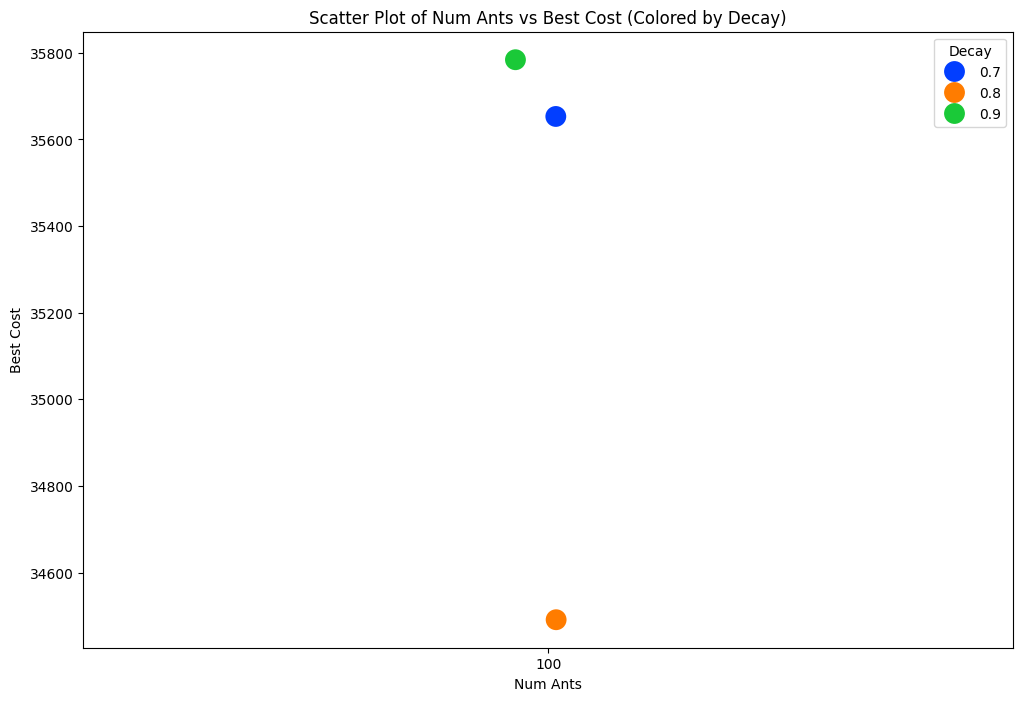

In [24]:
def plot_all_results(all_results):
    data = []

    for i, iteration_results in enumerate(all_results):
        for result in iteration_results:
            data.append({
                'Num Ants': result['num_ants'],
                'Best Cost': result['best_cost'],
                'Decay': result['decay']
            })

    df = pd.DataFrame(data)

    plt.figure(figsize=(12, 8))
    sns.stripplot(x='Num Ants', y='Best Cost', hue='Decay', data=df, palette='bright', jitter=True, size=15)
    plt.title('Scatter Plot of Num Ants vs Best Cost (Colored by Decay)')
    plt.show()

plot_all_results(all_results)


In [14]:
# Your graph as a 2D list
graph = costs

# Set algorithm parameters
num_iterations = 100
alpha = 1.0
beta = 2.0
rho = 0.3
q = 1.0
rank_factor = 1.0  # Factor to adjust the influence of rank on pheromone update

num_ants = [10, 50, 100]
d_num_ants4 = {"10": [], "50": [], "100": []}

for _ in range(5):
    for i in num_ants:
        best_path, best_cost = rank_based_ant_system(graph, i, alpha, beta, rho, q, rank_factor)
        print(f"{i} Ants, Best Cost: {best_cost}")
        d_num_ants4[str(i)].append(best_cost)

data4 = d_num_ants4

10 Ants, Best Cost: 40062.0
50 Ants, Best Cost: 35016.0
100 Ants, Best Cost: 33659.0
10 Ants, Best Cost: 40168.0
50 Ants, Best Cost: 35494.0
100 Ants, Best Cost: 33408.0
10 Ants, Best Cost: 36227.0
50 Ants, Best Cost: 36696.0
100 Ants, Best Cost: 34486.0
10 Ants, Best Cost: 40677.0
50 Ants, Best Cost: 34235.0
100 Ants, Best Cost: 32683.0
10 Ants, Best Cost: 42022.0
50 Ants, Best Cost: 36215.0
100 Ants, Best Cost: 35390.0


# Plots of different ACO approaches

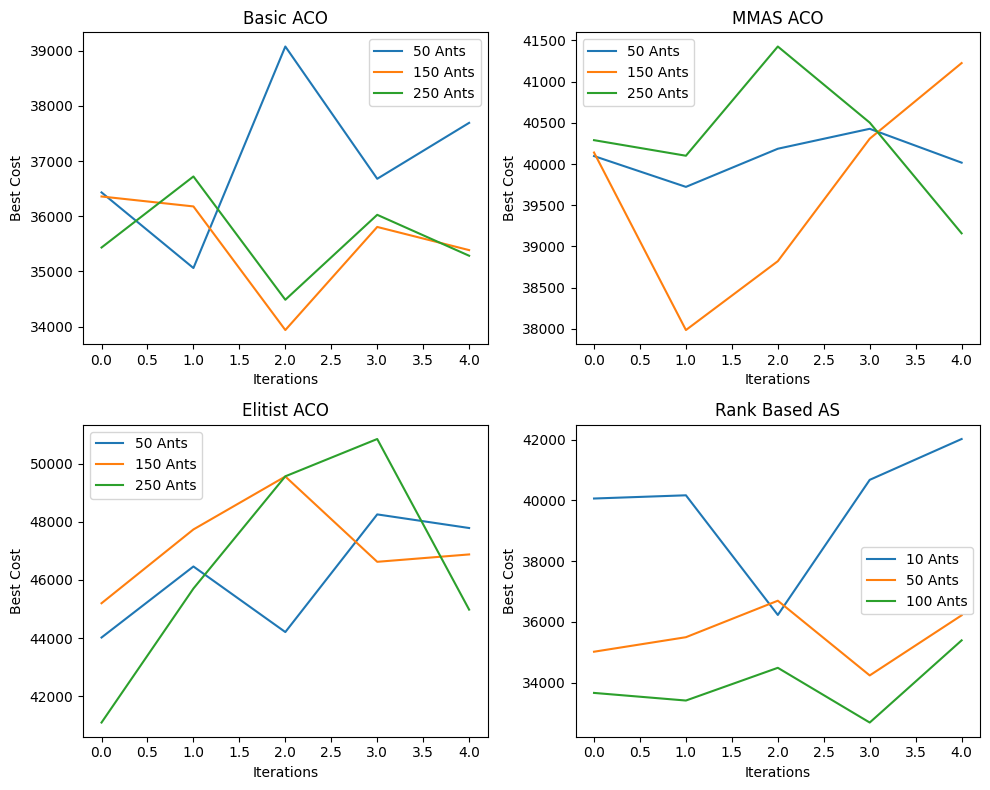

In [16]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot data1
for key, values in data.items():
    axs[0, 0].plot(values, label=f'{key} Ants')

axs[0, 0].set_title('Basic ACO')
axs[0, 0].set_xlabel('Iterations')
axs[0, 0].set_ylabel('Best Cost')
axs[0, 0].legend()

# Plot data2
for key, values in data2.items():
    axs[0, 1].plot(values, label=f'{key} Ants')

axs[0, 1].set_title('MMAS ACO')
axs[0, 1].set_xlabel('Iterations')
axs[0, 1].set_ylabel('Best Cost')
axs[0, 1].legend()

# Plot data3
for key, values in data3.items():
    axs[1, 0].plot(values, label=f'{key} Ants')

axs[1, 0].set_title('Elitist ACO')
axs[1, 0].set_xlabel('Iterations')
axs[1, 0].set_ylabel('Best Cost')
axs[1, 0].legend()

# Plot data4
for key, values in data4.items():
    axs[1, 1].plot(values, label=f'{key} Ants')

axs[1, 1].set_title('Rank Based AS')
axs[1, 1].set_xlabel('Iterations')
axs[1, 1].set_ylabel('Best Cost')
axs[1, 1].legend()

plt.tight_layout()
plt.show()
